# reshaing the pandas frame 

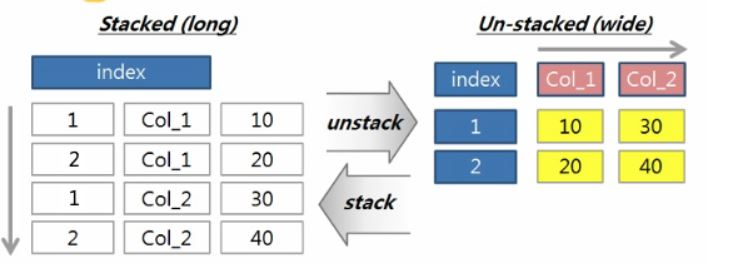


- stack : 위에서 아래로 (행방향)
- unstack : 왼쪽에서 오른쪽으로 (열방향)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
data = titanic.groupby(['pclass', 'sex'])[['survived', 'age', 'fare']].mean()
data

survived        age        fare
pclass sex                                    
1      female  0.968085  34.611765  106.125798
       male    0.368852  41.281386   67.226127
2      female  0.921053  28.722973   21.970121
       male    0.157407  30.740707   19.741782
3      female  0.500000  21.750000   16.118810
       male    0.135447  26.507589   12.661633

# stack
- stack() 함수는 series를 반환한다. 

In [9]:
data.stack()

pclass  sex             
1       female  survived      0.968085
                age          34.611765
                fare        106.125798
        male    survived      0.368852
                age          41.281386
                fare         67.226127
2       female  survived      0.921053
                age          28.722973
                fare         21.970121
        male    survived      0.157407
                age          30.740707
                fare         19.741782
3       female  survived      0.500000
                age          21.750000
                fare         16.118810
        male    survived      0.135447
                age          26.507589
                fare         12.661633
dtype: float64

In [13]:
data.stack()[1]  # plcass가 1인 data 불러옴

sex             
female  survived      0.968085
        age          34.611765
        fare        106.125798
male    survived      0.368852
        age          41.281386
        fare         67.226127
dtype: float64

In [14]:
data.stack()[2] #  plcass가 2인 data 불러옴

sex             
female  survived     0.921053
        age         28.722973
        fare        21.970121
male    survived     0.157407
        age         30.740707
        fare        19.741782
dtype: float64

In [15]:
data.stack()[1]["female"] # p class가  1이고 female인 data불러옴

survived      0.968085
age          34.611765
fare        106.125798
dtype: float64

In [16]:
data.stack()[1]["male"]  # p class가  1이고 male인 data불러옴

survived     0.368852
age         41.281386
fare        67.226127
dtype: float64

In [17]:
data.stack()[1]["female"][['survived', 'fare']]
# p class가  1이고 female 이면서 survived, fare컬럼만 가져옴

survived      0.968085
fare        106.125798
dtype: float64

In [19]:
# unstack()

In [21]:
data

survived        age        fare
pclass sex                                    
1      female  0.968085  34.611765  106.125798
       male    0.368852  41.281386   67.226127
2      female  0.921053  28.722973   21.970121
       male    0.157407  30.740707   19.741782
3      female  0.500000  21.750000   16.118810
       male    0.135447  26.507589   12.661633